In [1]:
cd c:\Users\Rirhc\OneDrive\Desktop\My Folder\CEDT\Year 2\Semester 1.2568\[DSDE]\Project with Git\JekTurnRight_dsde

c:\Users\Rirhc\OneDrive\Desktop\My Folder\CEDT\Year 2\Semester 1.2568\[DSDE]\Project with Git\JekTurnRight_dsde


In [ ]:
import pandas as pd
# import geopandas as gpd
# import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import plotly.express as px
from src.de.load.loader import DataLoader
from src.common.dataprep import get_cleaned_data
from src.common.dataprep import clean_type_columns
from src.common.dataprep import get_shape_file

In [3]:
# df = pd.read_csv('data/raw/bangkok_traffy.csv')
# shape = gpd.read_file('data/raw/BMA/BMA_ADMIN_SUB_DISTRICT.shp')

df_path = 'data/raw/bangkok_traffy.csv'
shape_path = 'data/raw/BMA/BMA_ADMIN_SUB_DISTRICT.shp'
df = get_cleaned_data(df_path, shape_path)

df.info()

c:\Users\Rirhc\OneDrive\Desktop\My Folder\CEDT\Year 2\Semester 1.2568\[DSDE]\Project with Git\JekTurnRight_dsde\src\common\dataprep.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')
c:\Users\Rirhc\OneDrive\Desktop\My Folder\CEDT\Year 2\Semester 1.2568\[DSDE]\Project with Git\JekTurnRight_dsde\src\common\dataprep.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_activity'] = pd.to_datetime(df['last_activity'], format='ISO8601'

<class 'pandas.core.frame.DataFrame'>
Index: 510414 entries, 19 to 774306
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   ticket_id        510414 non-null  object             
 1   type             510414 non-null  object             
 2   organization     510414 non-null  object             
 3   comment          510414 non-null  object             
 4   coords           510414 non-null  object             
 5   address          510414 non-null  object             
 6   subdistrict      510414 non-null  object             
 7   district         510414 non-null  object             
 8   province         510414 non-null  object             
 9   timestamp        510414 non-null  datetime64[ns, UTC]
 10  state            510414 non-null  object             
 11  count_reopen     510414 non-null  int64              
 12  last_activity    510414 non-null  datetime64[ns, UTC]
 13  yea

# Step 0
Create daily report table, which contain amount of report in each date.

In [4]:
df['date_timestamp'] = df['timestamp'].dt.date
daily_reports = df.groupby('date_timestamp').size().reset_index(name='report_count')
daily_reports.rename(columns={'date_timestamp':'date'}, inplace=True)
display(daily_reports)


,date,report_count
0,2022-01-16,2
1,2022-01-17,1
2,2022-01-26,1
3,2022-01-30,1
4,2022-02-01,1
...,...,...
978,2024-12-27,477
979,2024-12-28,366
980,2024-12-29,310
981,2024-12-30,412


# Report 1 : Distribution of report
### Report 1.1 : Distribution of report (all year)

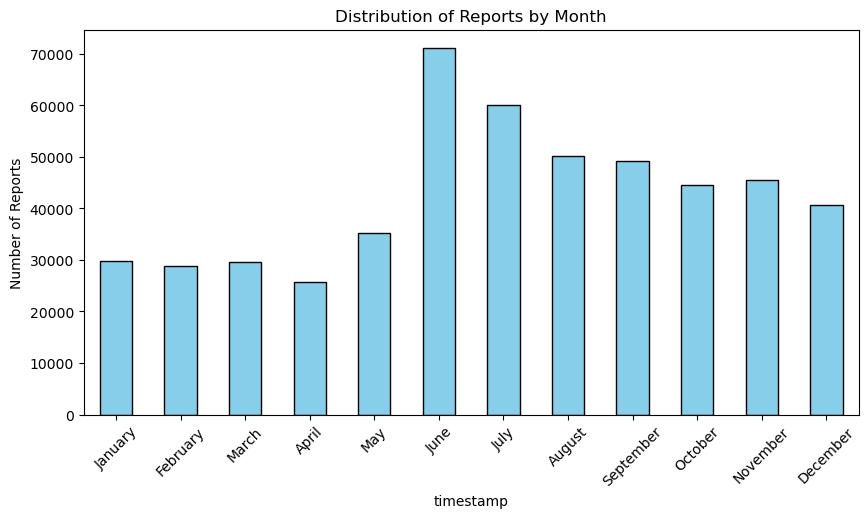

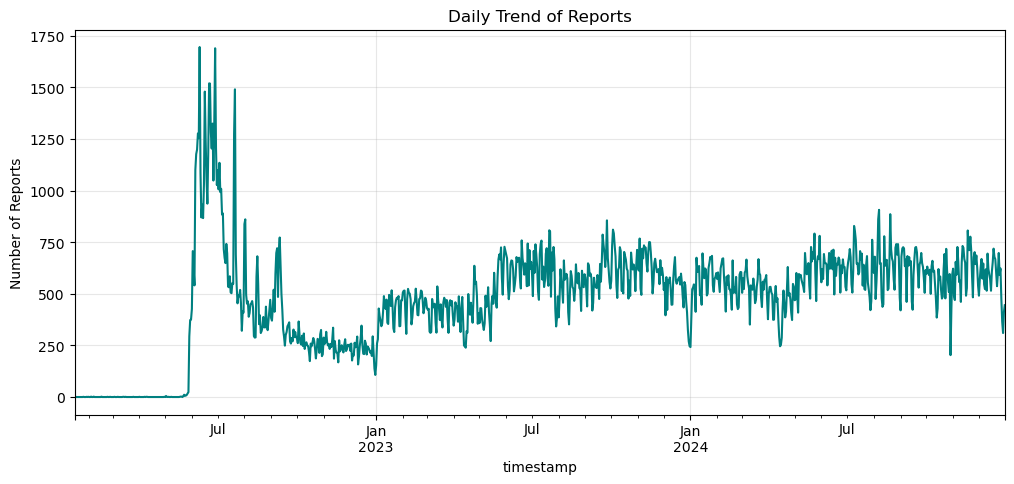

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# --- OPTION 1: Monthly Bar Chart (Overview) ---
# Group by month (1-12)
monthly_counts = df.groupby(df['timestamp'].dt.month_name()).size()

# Reorder months correctly (otherwise they sort Alphabetically: April, August...)
order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(order)

# Plot
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Reports by Month')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()

daily_counts = df.set_index('timestamp').resample('D').size()

# Plot
plt.figure(figsize=(12, 5))
daily_counts.plot(kind='line', color='teal')
plt.title('Daily Trend of Reports')
plt.ylabel('Number of Reports')
plt.grid(True, alpha=0.3)
plt.show()

### Report 1.2 : Distribution of report (in a year)

In [6]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Get list of unique years
all_years = sorted(df['year_timestamp'].unique())

def update_charts(selected_years):
    # 1. Filter Data
    filtered_df = df[df['year_timestamp'].isin(selected_years)].copy()
    
    if filtered_df.empty:
        print("No years selected!")
        return

    # 2. Create Subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Bar Chart Logic
    monthly_counts = filtered_df.groupby([filtered_df['timestamp'].dt.month, filtered_df['year_timestamp']]).size().unstack()
    monthly_counts.plot(kind='bar', ax=ax1, width=0.8)
    ax1.set_title(f"Monthly Distribution for: {selected_years}")
    ax1.set_xlabel("Month")
    
    # Line Chart Logic
    daily_counts = filtered_df.set_index('timestamp').resample('D').size()
    daily_counts.plot(kind='line', ax=ax2, color='teal')
    ax2.set_title("Daily Trend")
    
    plt.tight_layout()
    plt.show()

# Create the Checkbox Widget
year_selector = widgets.SelectMultiple(
    options=all_years,
    value=list(all_years), # Default select all
    description='Years:',
    disabled=False
)

# Bind the function to the widget
widgets.interactive(update_charts, selected_years=year_selector)

interactive(children=(SelectMultiple(description='Years:', index=(0, 1, 2), options=(2022, 2023, 2024), value=…

# Report 2 : Distribution of each tag
### Report 2.1 : Distribution of each tag (all data)

# Report 3 : Distribution of tag 'น้ำท่วม'
### Report 3.1 : Distribution of tag 'น้ำท่วม' (all data)

C:\Users\Rirhc\AppData\Local\Temp\ipykernel_2092\591929196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


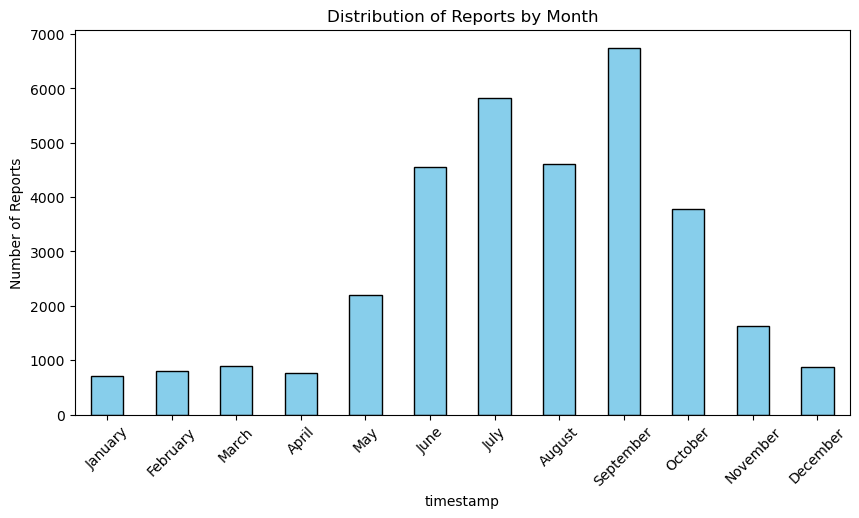

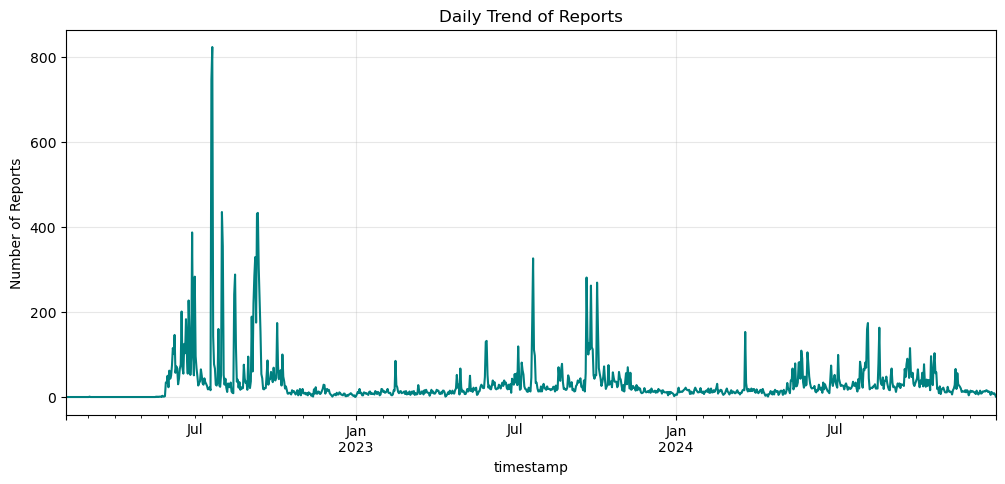

In [7]:
df2 = df

df = df[df['type'].str.contains('น้ำท่วม')]

df['timestamp'] = pd.to_datetime(df['timestamp'])

# --- OPTION 1: Monthly Bar Chart (Overview) ---
# Group by month (1-12)
monthly_counts = df.groupby(df['timestamp'].dt.month_name()).size()

# Reorder months correctly (otherwise they sort Alphabetically: April, August...)
order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(order)

# Plot
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Reports by Month')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()

daily_counts = df.set_index('timestamp').resample('D').size()

# Plot
plt.figure(figsize=(12, 5))
daily_counts.plot(kind='line', color='teal')
plt.title('Daily Trend of Reports')
plt.ylabel('Number of Reports')
plt.grid(True, alpha=0.3)
plt.show()

### Report 3.2 : Distribution of tag 'น้ำท่วม' (in a year)

In [8]:
# Get list of unique years
all_years = sorted(df['year_timestamp'].unique())

def update_charts(selected_years):
    # 1. Filter Data
    filtered_df = df[df['year_timestamp'].isin(selected_years)].copy()
    
    if filtered_df.empty:
        print("No years selected!")
        return

    # 2. Create Subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Bar Chart Logic
    monthly_counts = filtered_df.groupby([filtered_df['timestamp'].dt.month, filtered_df['year_timestamp']]).size().unstack()
    monthly_counts.plot(kind='bar', ax=ax1, width=0.8)
    ax1.set_title(f"Monthly Distribution for: {selected_years}")
    ax1.set_xlabel("Month")
    
    # Line Chart Logic
    daily_counts = filtered_df.set_index('timestamp').resample('D').size()
    daily_counts.plot(kind='line', ax=ax2, color='teal')
    ax2.set_title("Daily Trend")
    
    plt.tight_layout()
    plt.show()

# Create the Checkbox Widget
year_selector = widgets.SelectMultiple(
    options=all_years,
    value=list(all_years), # Default select all
    description='Years:',
    disabled=False
)

# Bind the function to the widget
widgets.interactive(update_charts, selected_years=year_selector)

interactive(children=(SelectMultiple(description='Years:', index=(0, 1, 2), options=(2022, 2023, 2024), value=…

# Report 4 : Distribution of co-occurrence tag with tag 'น้ำท่วม'
### Report 4.1 : Distribution of co-occurrence tag with tag 'น้ำท่วม' (all data)

In [9]:
df = clean_type_columns(df2)

# 1. Ensure we are working with a DataFrame where 'type_list' is a list
# (If you already exploded df, we might need to group by ID first. 
#  Assuming df has 'type_list' as a list of strings here.)

target_tag = 'น้ำท่วม'

# Filter: Get only rows where 'น้ำท่วม' is present
# We use .apply to check if the tag is in the list
flood_rows = df[df['type_list'].apply(lambda x: target_tag in x if isinstance(x, list) else False)].copy()

# 2. Explode to separate all tags in these specific rows
all_co_tags = flood_rows.explode('type_list')

# 3. Remove the target tag itself (otherwise it will be the top bar with 100%)
co_occurrence = all_co_tags[all_co_tags['type_list'] != target_tag]

# 4. Count frequency
tag_counts = co_occurrence['type_list'].value_counts().reset_index()
tag_counts.columns = ['tag', 'count']

# 5. Visualize
fig = px.bar(
    tag_counts.head(15), # Show top 15 related tags
    x='count', 
    y='tag', 
    orientation='h', # Horizontal bar
    title=f"Top Tags Co-occurring with '{target_tag}'",
    text='count',
    color='count',
    color_continuous_scale='Blues'
)

# Reverse axis so the highest number is at the top
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

# Report 5 : Table number of reports
### Report 5.1 : Table number of reports with tag 'น้ำท่วม' (all data)

In [ ]:
shape = get_shape_file(shape_path)
shape_centers = shape.copy()
shape_centers['centroid'] = shape_centers.geometry.centroid.to_crs(epsg=4326)
shape_centers['latitude'] = shape_centers['centroid'].y
shape_centers['longitude'] = shape_centers['centroid'].x

daily_counts = df.groupby(['subdistrict', df['timestamp'].dt.date]).size().reset_index(name='number_of_report')
daily_counts.rename(columns={'timestamp': 'date'}, inplace=True)

# 3. Merge
final_table = daily_counts.merge(
    shape_centers[['SUBDISTR_1', 'latitude', 'longitude']],
    left_on='subdistrict',
    right_on='SUBDISTR_1',
    how='left'
)

display(final_table.head(10))

,subdistrict,date,number_of_report,SUBDISTR_1,latitude,longitude
0,กระทุ่มราย,2022-05-29,2,กระทุ่มราย,13.825803,100.891579
1,กระทุ่มราย,2022-05-30,3,กระทุ่มราย,13.825803,100.891579
2,กระทุ่มราย,2022-05-31,3,กระทุ่มราย,13.825803,100.891579
3,กระทุ่มราย,2022-06-01,3,กระทุ่มราย,13.825803,100.891579
4,กระทุ่มราย,2022-06-02,2,กระทุ่มราย,13.825803,100.891579
5,กระทุ่มราย,2022-06-03,7,กระทุ่มราย,13.825803,100.891579
6,กระทุ่มราย,2022-06-04,4,กระทุ่มราย,13.825803,100.891579
7,กระทุ่มราย,2022-06-05,10,กระทุ่มราย,13.825803,100.891579
8,กระทุ่มราย,2022-06-06,9,กระทุ่มราย,13.825803,100.891579
9,กระทุ่มราย,2022-06-08,10,กระทุ่มราย,13.825803,100.891579


(111666, 6)

In [16]:
final_table['number_of_report'].value_counts()

number_of_report
1     23922
2     19544
3     15538
4     12073
5      9113
      ...  
83        1
58        1
90        1
73        1
60        1
Name: count, Length: 86, dtype: int64